# **Problem Statement**

## Business Context

A sales forecast predicts future sales revenue based on historical data, industry trends, and the status of the current sales pipeline. Businesses use the sales forecast to estimate weekly, monthly, quarterly, and annual sales totals. A company needs to make an accurate sales forecast as it adds value across an organization and helps the different verticals to chalk out their future course of action.

Forecasting helps an organization plan its sales operations by region and provides valuable insights to the supply chain team regarding the procurement of goods and materials. An accurate sales forecast process has many benefits, which include improved decision-making about the future and the reduction of sales pipeline and forecast risks. Moreover, it helps to reduce the time spent in planning territory coverage and establishes benchmarks that can be used to assess trends in the future.


## Objective

SuperKart is a retail chain operating supermarkets and food marts across various tier cities, offering a wide range of products. To optimize its inventory management and make informed decisions around regional sales strategies, SuperKart wants to accurately forecast the sales revenue of its outlets for the upcoming quarter.

To operationalize these insights at scale, the company has partnered with a data science firm, not just to build a predictive model based on historical sales data but also to develop and deploy a robust forecasting solution that can be integrated into SuperKart’s decision-making systems and used across its network of stores.


## Data Description

The data contains the different attributes of the various products and stores.

- **`Product_Id`**: Unique identifier of each product, each identifier having two letters at the beginning, followed by a number
- **`Product_Weight`**: Weight of each product
- **`Product_Sugar_Content`**: Sugar content of each product, like low sugar, regular, and no sugar
- **`Product_Allocated_Area`**: Ratio of the allocated display area of each product to the total display area of all the products in a store
- **`Product_Type`**: Broad category for each product like meat, snack foods, hard drinks, dairy, canned, soft drinks, health and hygiene, baking goods, bread, breakfast, frozen foods, fruits and vegetables, household, seafood, starchy foods, others
- **`Product_MRP`**: Maximum retail price of each product
- **`Store_Id`**: Unique identifier of each store
- **`Store_Establishment_Year`**: Year in which the store was established
- **`Store_Size`**: Size of the store, depending on sq. feet, like high, medium, and low
- **`Store_Location_City_Type`**: Type of city in which the store is located, like Tier 1, Tier 2, and Tier 3. Tier 1 consists of cities where the standard of living is comparatively higher than that of its Tier 2 and Tier 3 counterparts
- **`Store_Type`**: Type of store depending on the products that are being sold there, like Departmental Store, Supermarket Type 1, Supermarket Type 2, and Food Mart
- **`Product_Store_Sales_Total`**: Total revenue generated by the sale of that particular product in that particular store


# **Installing and Importing the necessary libraries**

In [1]:
#Installing the libraries with the specified versions
!pip install  pandas numpy scikit-learn xgboost joblib streamlit huggingface_hub gunicorn -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 77.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 57.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 2.3 MB/s eta 0:00:00


In [2]:
import warnings
warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# For splitting the dataset
from sklearn.model_selection import train_test_split

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingRegressor,
    RandomForestRegressor,
    AdaBoostRegressor,
    GradientBoostingRegressor,
)
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor

# Libraries to get different metric scores
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    mean_absolute_percentage_error,
    make_scorer
)

# To create the pipeline
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline,Pipeline

# To tune different models and standardize
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler,OneHotEncoder

# To serialize the model
import joblib

# os related functionalities
import os

# API request
import requests

# for hugging face space authentication to upload files
from huggingface_hub import login, HfApi

import sklearn
import xgboost
import flask
import werkzeug
import streamlit
import uvicorn
import requests
import gunicorn

# **Loading the dataset**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data = pd.read_csv('/content/drive/MyDrive/Dataset/SuperKart.csv')
data.head()

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total
0,FD6114,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40
1,FD7839,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02
2,FD5075,14.28,Regular,0.031,Canned,162.08,OUT001,1987,High,Tier 2,Supermarket Type1,4130.16
3,FD8233,12.10,Low Sugar,0.112,Baking Goods,186.31,OUT001,1987,High,Tier 2,Supermarket Type1,4132.18
4,NC1180,9.57,No Sugar,0.010,Health and Hygiene,123.67,OUT002,1998,Small,Tier 3,Food Mart,2279.36


# **Data Overview**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Product_Id                 8763 non-null   object 
 1   Product_Weight             8763 non-null   float64
 2   Product_Sugar_Content      8763 non-null   object 
 3   Product_Allocated_Area     8763 non-null   float64
 4   Product_Type               8763 non-null   object 
 5   Product_MRP                8763 non-null   float64
 6   Store_Id                   8763 non-null   object 
 7   Store_Establishment_Year   8763 non-null   int64  
 8   Store_Size                 8763 non-null   object 
 9   Store_Location_City_Type   8763 non-null   object 
 10  Store_Type                 8763 non-null   object 
 11  Product_Store_Sales_Total  8763 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 821.7+ KB


**Observations:**

- There are no null values present in the 8763 rows and 12 columns of data.
- The dataset contains:
  - **5 numeric data columns**
  - **8 categorical columns**


In [6]:
data['Store_Establishment_Year'].unique()

array([2009, 1999, 1987, 1998])

In [7]:
data.describe(include='all')

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total
count,8763,8763.000000,8763,8763.000000,8763,8763.000000,8763,8763.000000,8763,8763,8763,8763.000000
unique,8763,NaN,4,NaN,16,NaN,4,NaN,3,3,4,NaN
top,FD306,NaN,Low Sugar,NaN,Fruits and Vegetables,NaN,OUT004,NaN,Medium,Tier 2,Supermarket Type2,NaN
freq,1,NaN,4885,NaN,1249,NaN,4676,NaN,6025,6262,4676,NaN
mean,NaN,12.653792,NaN,0.068786,NaN,147.032539,NaN,2002.032751,NaN,NaN,NaN,3464.003640
std,NaN,2.217320,NaN,0.048204,NaN,30.694110,NaN,8.388381,NaN,NaN,NaN,1065.630494
min,NaN,4.000000,NaN,0.004000,NaN,31.000000,NaN,1987.000000,NaN,NaN,NaN,33.000000
25%,NaN,11.150000,NaN,0.031000,NaN,126.160000,NaN,1998.000000,NaN,NaN,NaN,2761.715000
50%,NaN,12.660000,NaN,0.056000,NaN,146.740000,NaN,2009.000000,NaN,NaN,NaN,3452.340000
75%,NaN,14.180000,NaN,0.096000,NaN,167.585000,NaN,2009.000000,NaN,NaN,NaN,4145.165000


**Observations:**

- `Product_Id` is unique to every entry, so it adds no relevance to model learning.
- `product_weight` has a mean of **12.65**.
- `Product_Sugar_Content` has **four unique categories** as mentioned.
- `Product_Allocated_Area` ranges from **0.004 to 0.298** and has a mean of **0.068**.
- `Product_Type` has **16 unique categories** as mentioned.
- `Product_MRP` ranges from **31 to 266** and has a mean of **147.032**.
- `Store_Id` has **4 unique categories** as mentioned.
- `Store_Establishment_Year` has **4 unique years** ranging from **1987 to 2009**.
- `Store_Size` has **3 unique categories** as mentioned.
- `Store_Location_City_Type` has **3 unique categories** as mentioned.
- `Store_Type` has **4 unique categories** as mentioned.
- `Product_Store_Sales_Total` ranges from **33 to 8000** for a specific product and outlet.



# **Exploratory Data Analysis (EDA)**

## Univariate Analysis

In [8]:
data.columns

Index(['Product_Id', 'Product_Weight', 'Product_Sugar_Content',
       'Product_Allocated_Area', 'Product_Type', 'Product_MRP', 'Store_Id',
       'Store_Establishment_Year', 'Store_Size', 'Store_Location_City_Type',
       'Store_Type', 'Product_Store_Sales_Total'],
      dtype='object')

In [9]:
ncols=[ 'Product_Weight',
       'Product_Allocated_Area',  'Product_MRP',
         'Product_Store_Sales_Total']

catcols=[  'Product_Sugar_Content',
        'Product_Type',  'Store_Id','Store_Size',
       'Store_Establishment_Year',  'Store_Location_City_Type',
       'Store_Type']

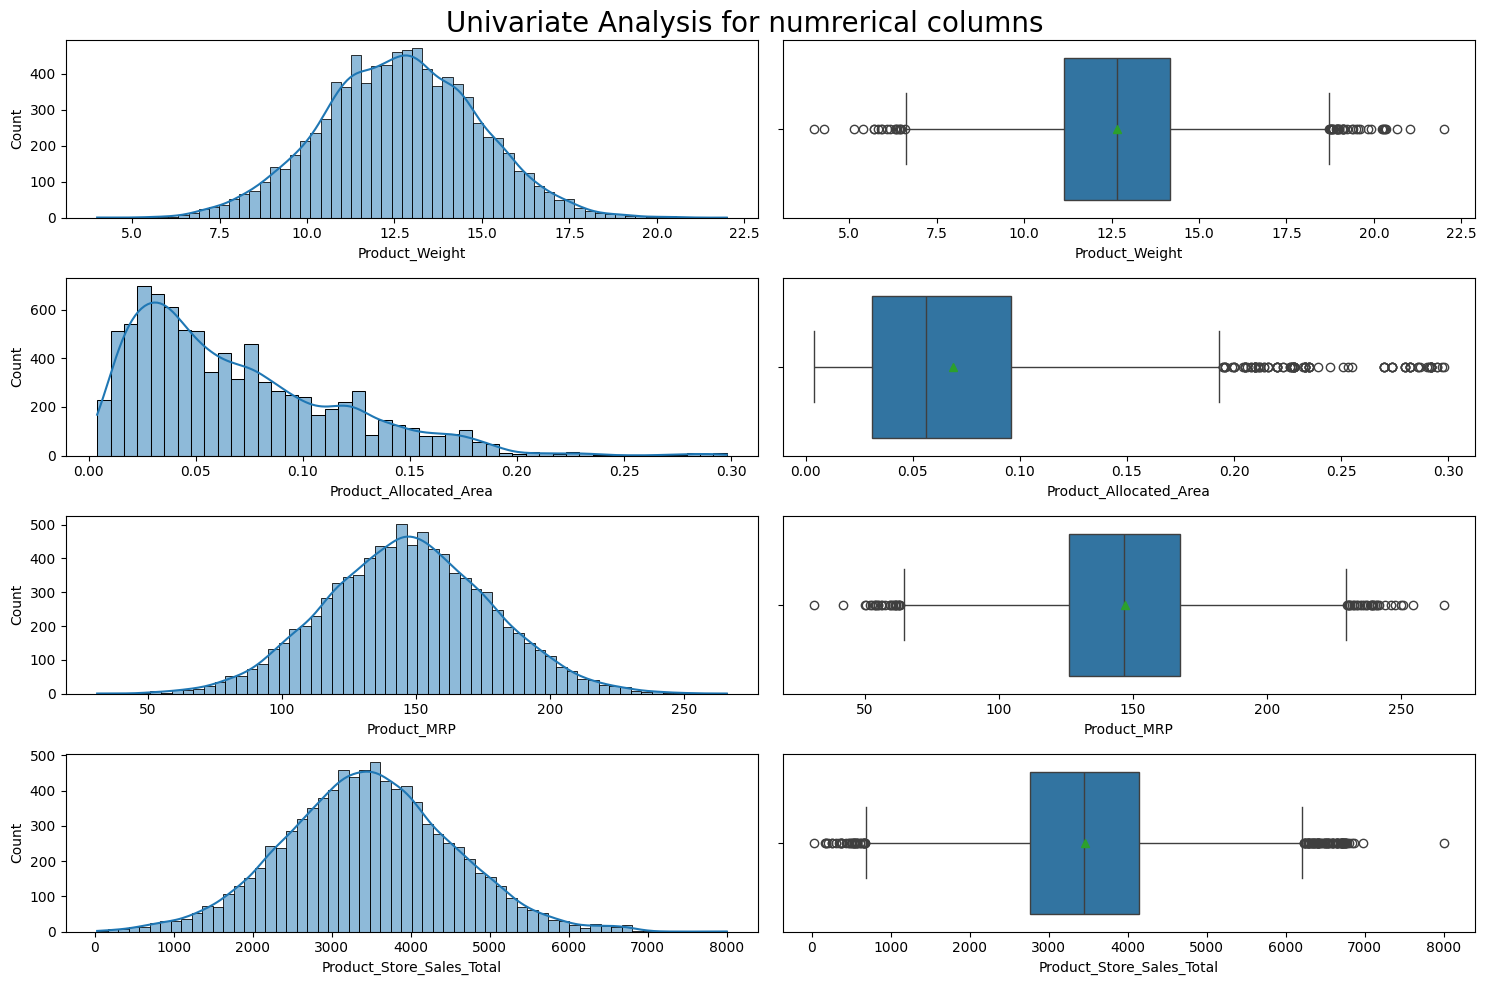

In [10]:
f,ax=plt.subplots(4,2,figsize=(15,10))

for i,j in enumerate(ncols):
  sns.histplot(data=data,x=j,ax=ax[i,0],kde=True)
  sns.boxplot(data=data,x=j,ax=ax[i,1],showmeans=True)
  ax[i,0].set_xlabel(j)
  ax[i,1].set_xlabel(j)

plt.tight_layout()
plt.subplots_adjust(top=.95)
f.suptitle('Univariate Analysis for numrerical columns',fontsize=20)
plt.show()



**Univariate Observations on Numeric Data Columns:**

- `Product_Weight`, `Product_MRP`, and `Product_Store_Sales_Total` show **normal skew**, thereby having relatively close mean and median values.
- `Product_Allocated_Area` shows **right skew**, with the mean being greater than the median, as shown in the boxplot.



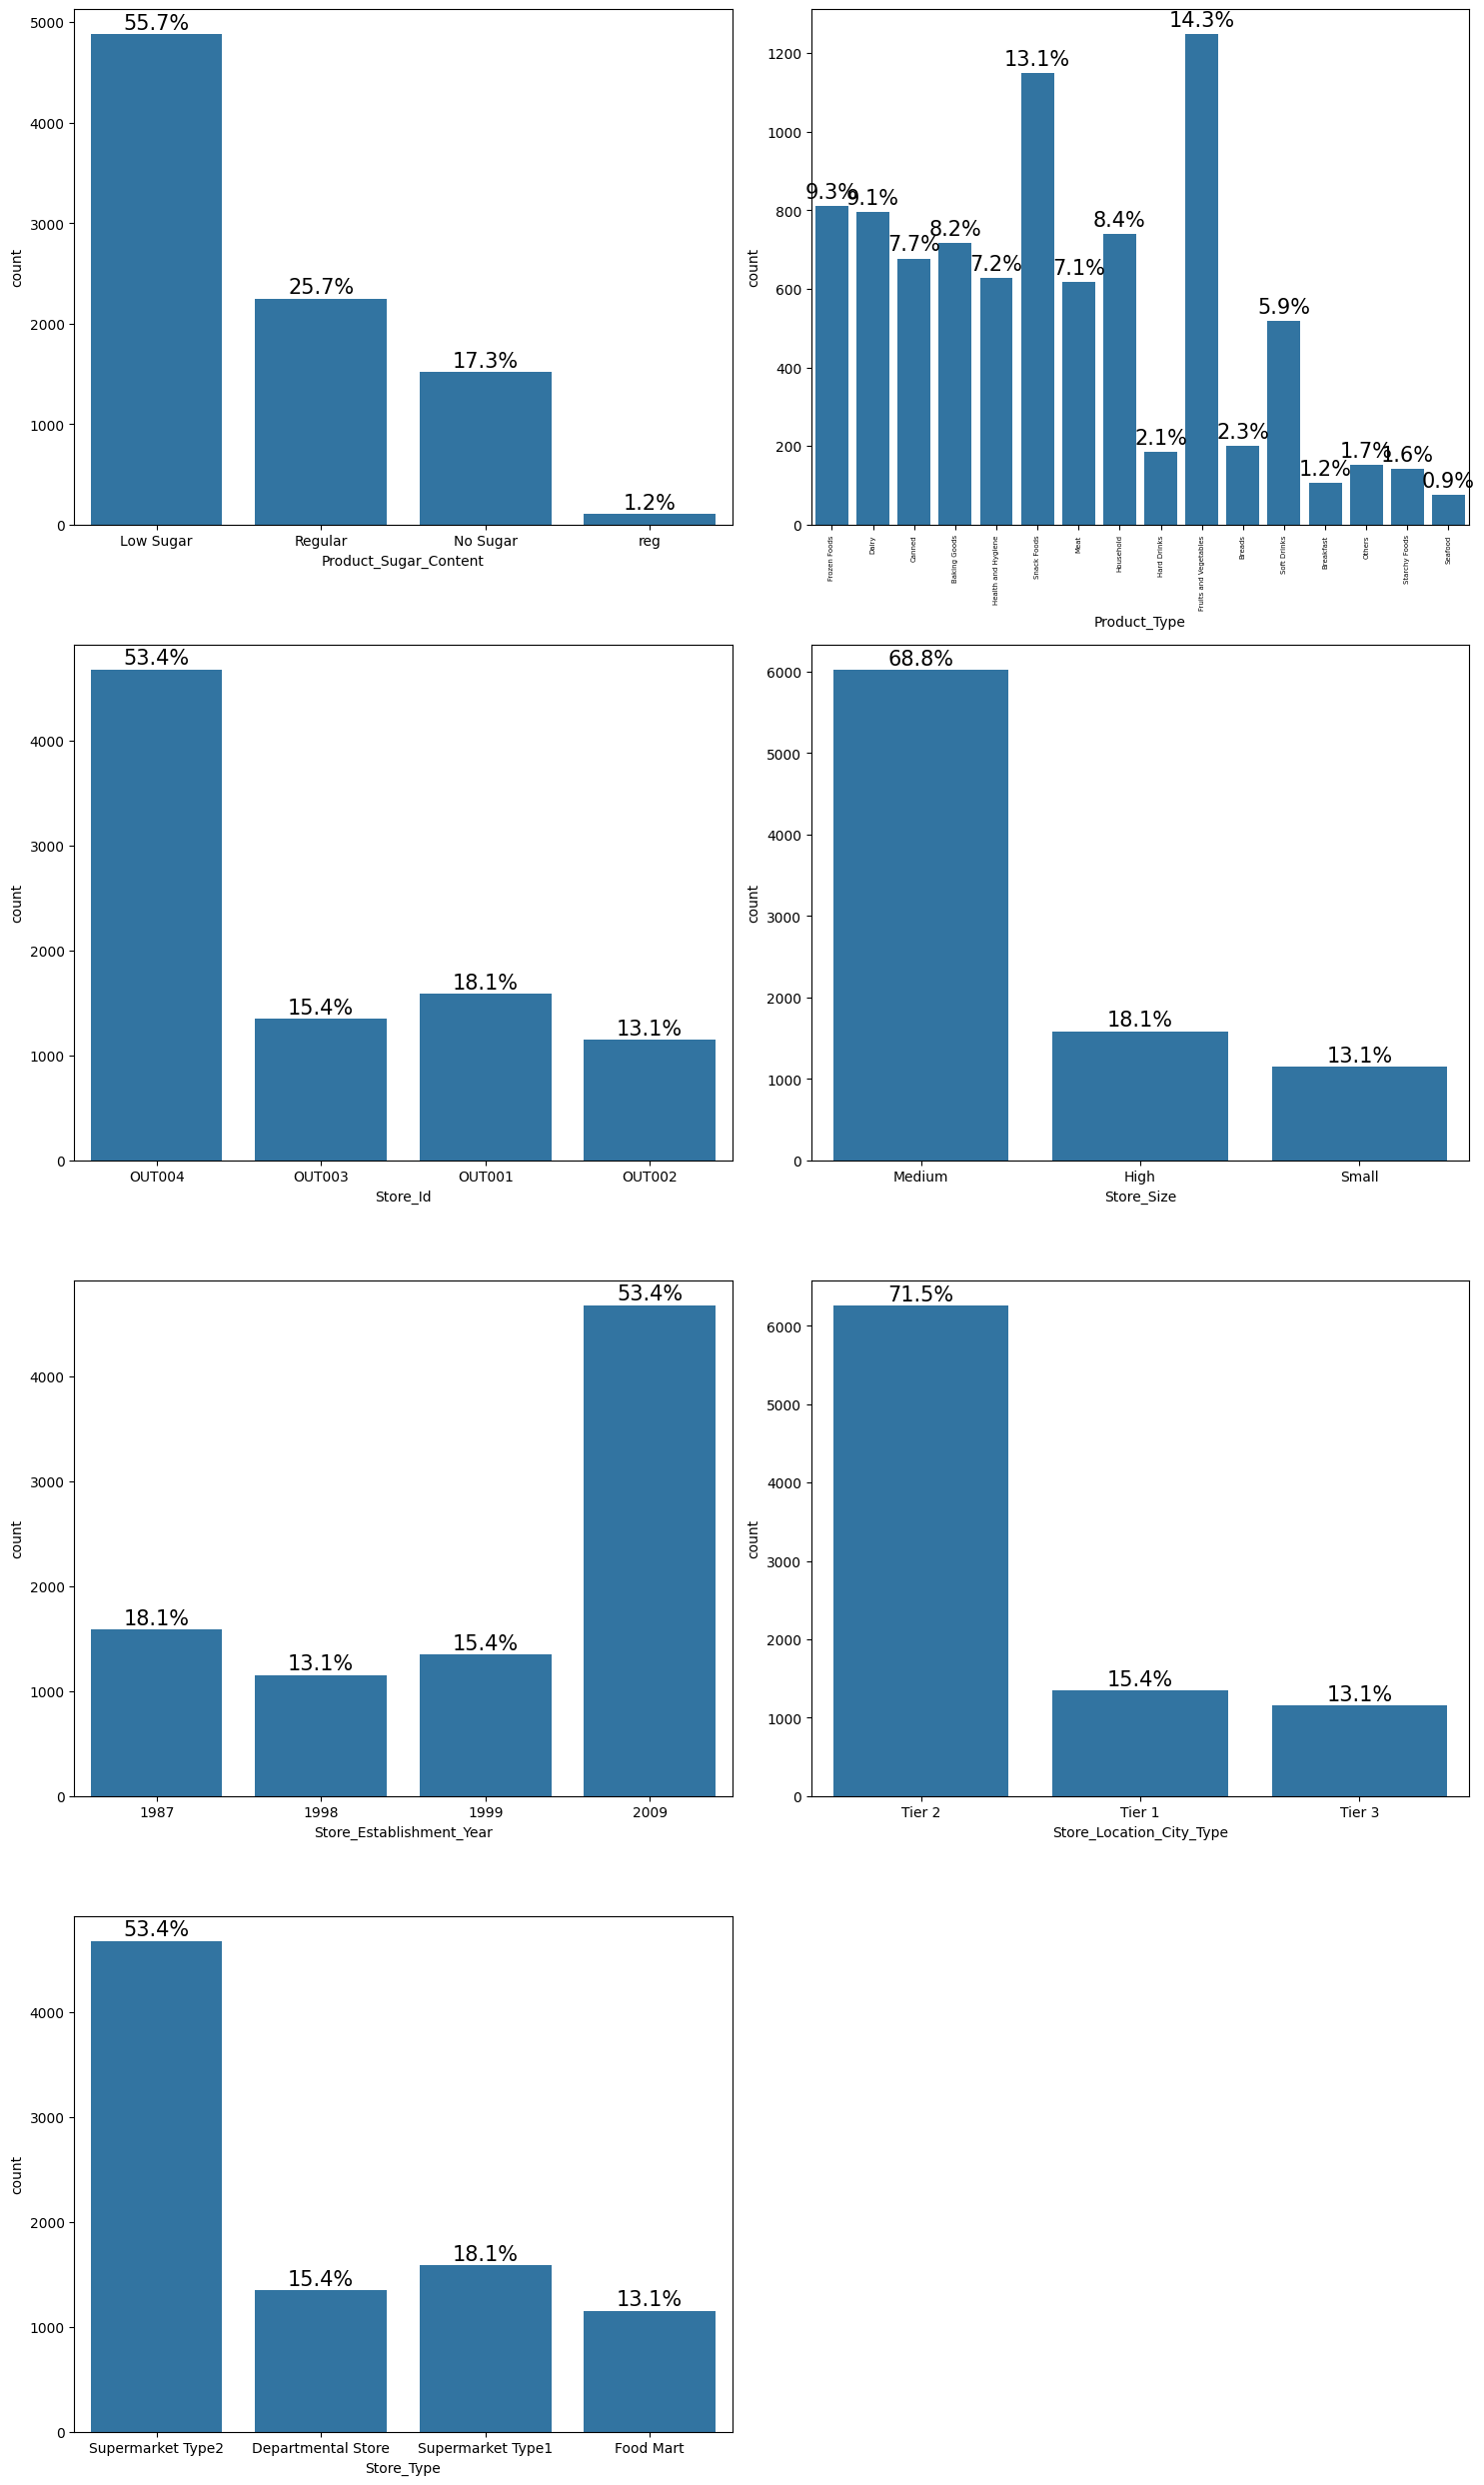

In [11]:
fc,ac=plt.subplots(4,2,figsize=(15,25))
ac=ac.flatten()
for i,j in enumerate(catcols):
  sns.countplot(data=data,x=j,ax=ac[i])
  if i == 1:  # Apply rotation to x-axis labels for the second subplot
        ac[i].tick_params(axis='x', rotation=90)
        ac[i].set_xticklabels(ac[i].get_xticklabels(), rotation=90,fontsize=5)
        ac[i].set_xlabel(j,fontsize=10)
  else:
        ac[i].set_xlabel(j,fontsize=10)
  for p in ac[i].patches:
        ac[i].text(p.get_x()+p.get_width()/2, p.get_height()+10,f'{((p.get_height()/8763)*100):.1f}%', ha='center', va='bottom',fontsize=15)
fc.delaxes(ac[7])
plt.tight_layout()
plt.show()

**Univariate Observations on Categorical Data:**

- Most sales occurrences are for foods with **Low Sugar** content and **Fruits and Vegetables**.
- A large number of sales occurrences happened at the **OUT004** store outlet, which was established in **2009**, and people mostly buy from **Medium-sized stores**.
- Most sales occurrences are observed in **Tier 2 cities** and in **Type2** of `Store_Type`.



## Bivariate Analysis

In [12]:
def plot_bivar(tar,cat):
  d,s=plt.subplots(2,2,figsize=(15,10))
  if(cat=='Product_Type'):
    sns.barplot(data=data,x=cat,y=tar,ax=s[0,0])
    sns.boxplot(data=data,x=cat,y=tar,ax=s[0,1])
    sns.boxplot(data=data,x=cat,y=tar,ax=s[1,0],showfliers=False)
    for i in [s[0, 0], s[0, 1], s[1, 0]]:
      i.set_xticklabels(i.get_xticklabels(), rotation=90, fontsize=10)

  else:
    sns.barplot(data=data,x=cat,y=tar,ax=s[0,0])
    sns.boxplot(data=data,x=cat,y=tar,ax=s[0,1])
    sns.boxplot(data=data,x=cat,y=tar,ax=s[1,0],showfliers=False)
  d.delaxes(s[1,1])
  plt.tight_layout()
  d.suptitle(f'Bivariate Analysis of {cat} and {tar}',fontsize=20)
  plt.subplots_adjust(top=.92)
  plt.show()

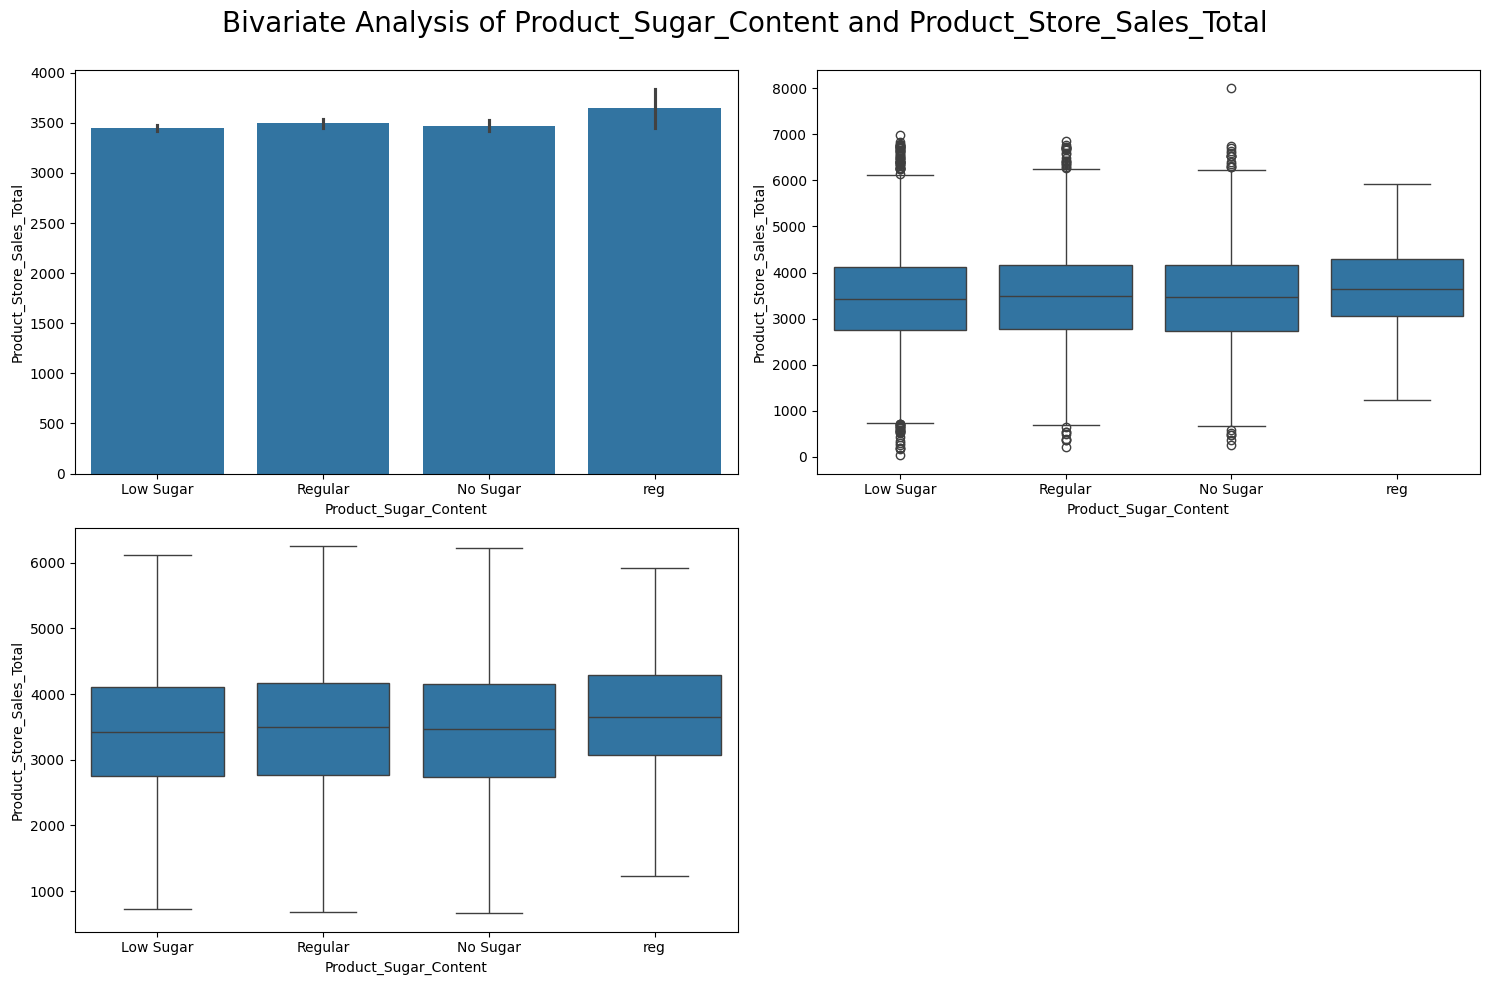

------------------------------------------------------------------------------------------------------------------------------------------------------


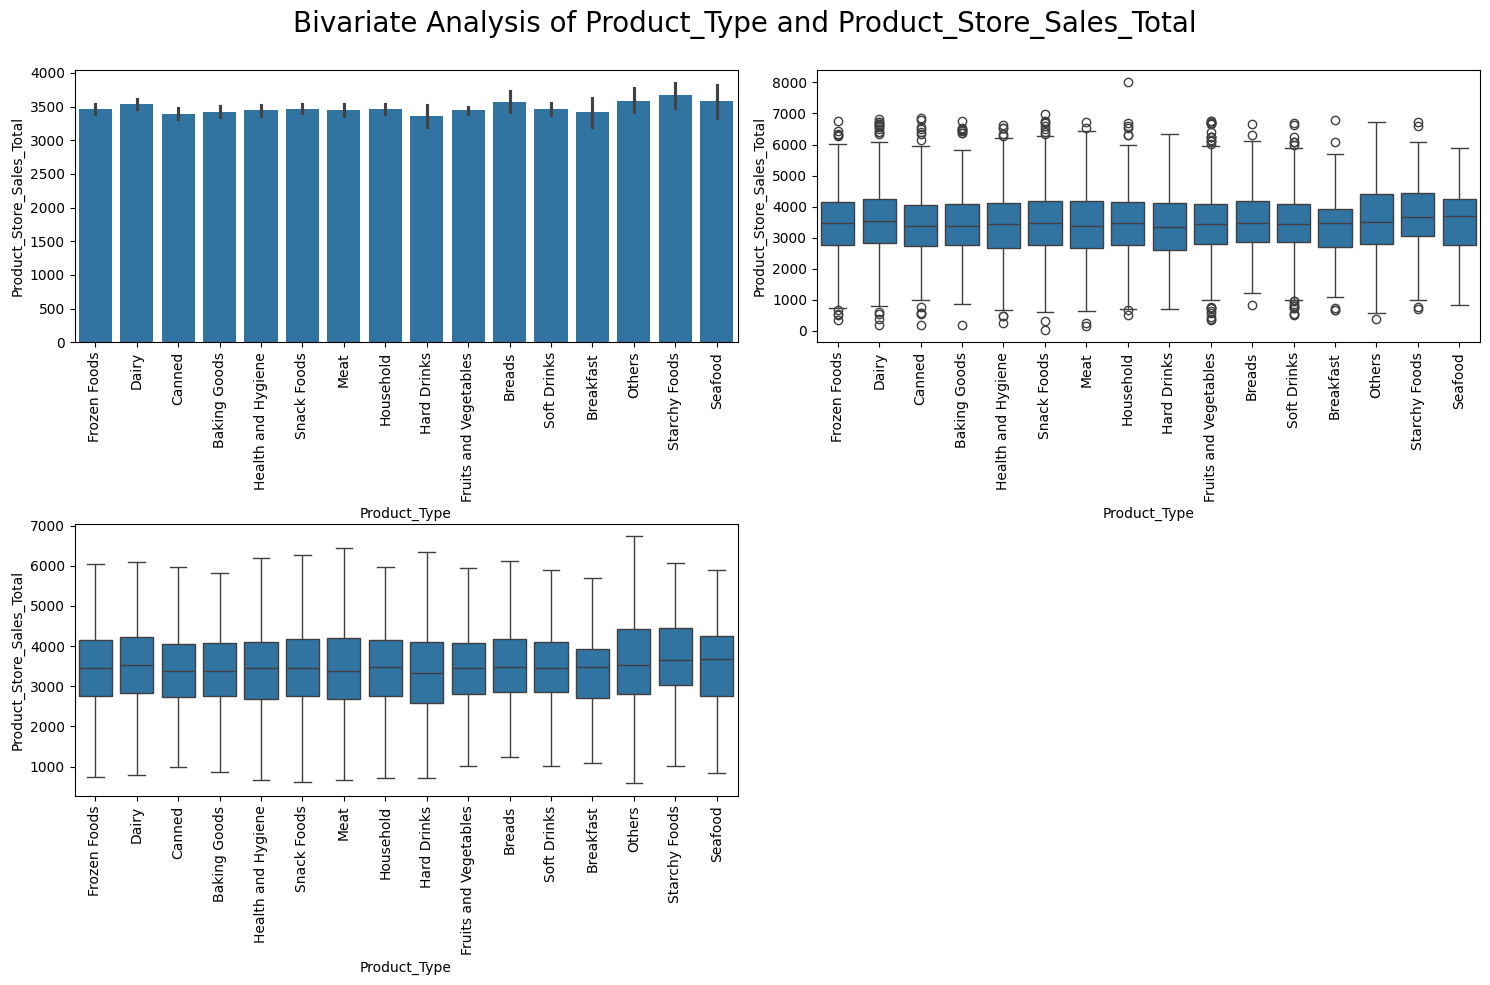

------------------------------------------------------------------------------------------------------------------------------------------------------


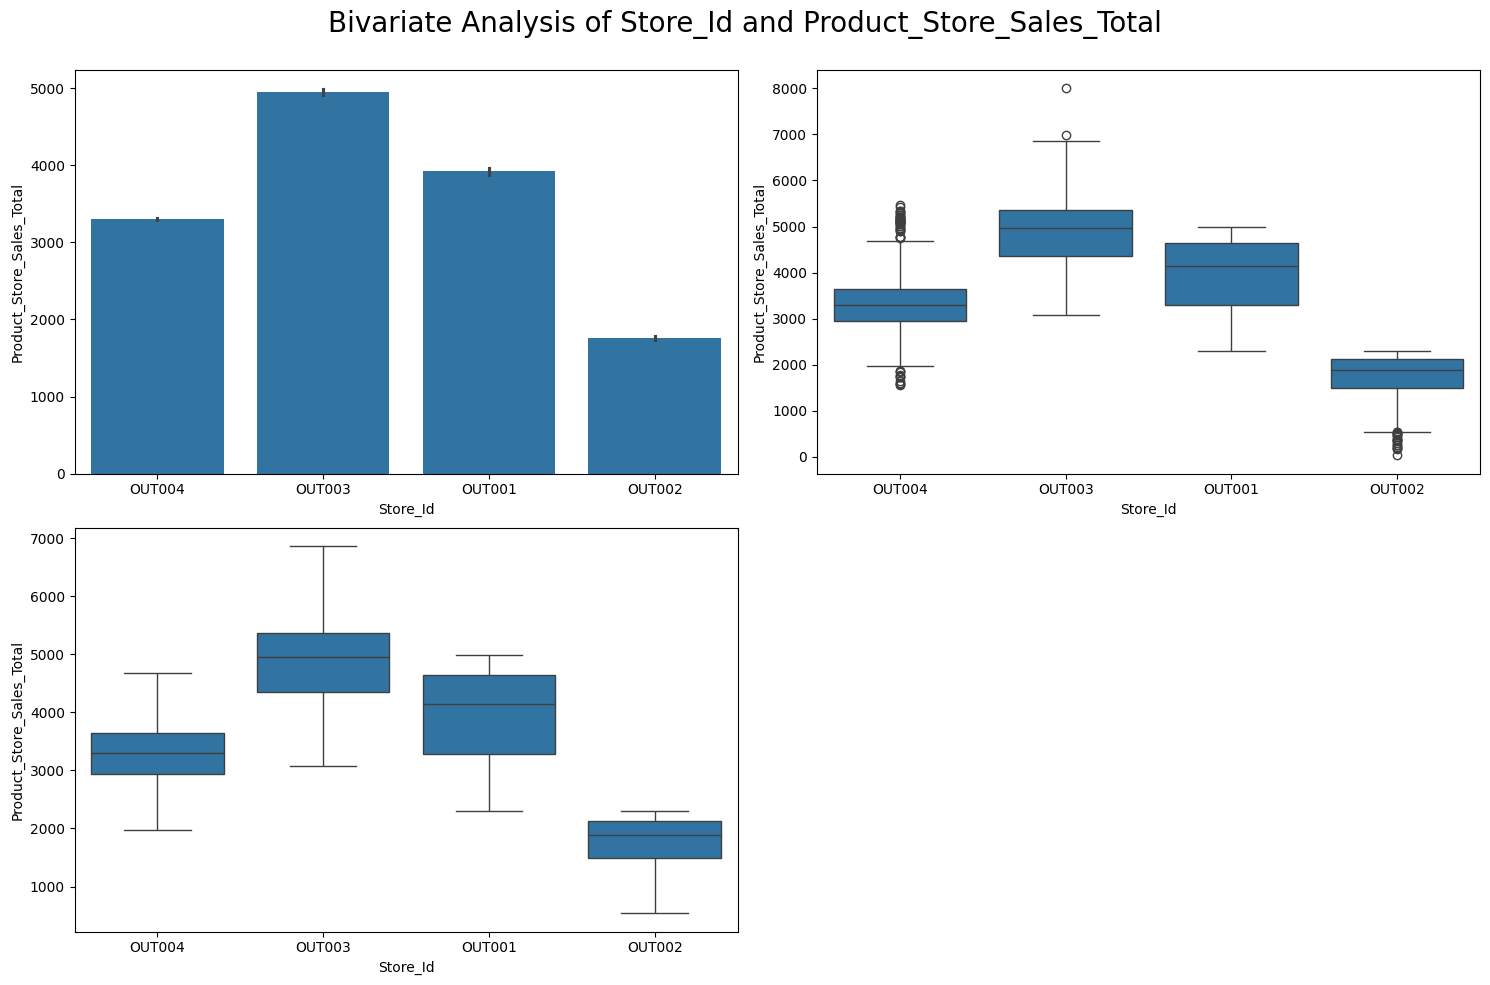

------------------------------------------------------------------------------------------------------------------------------------------------------


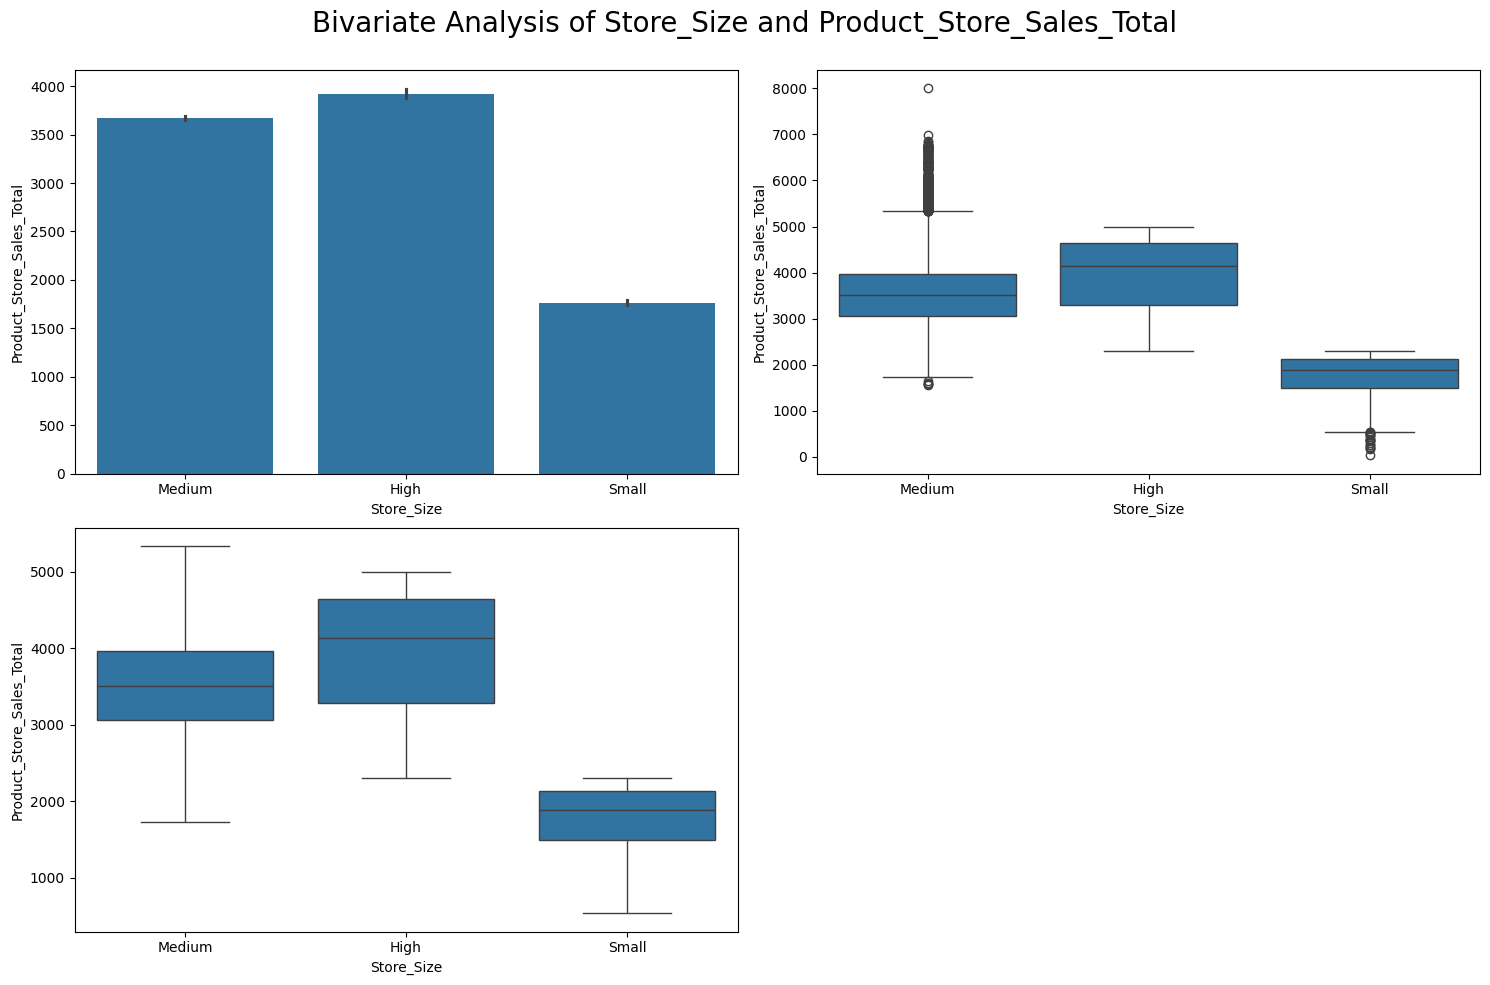

------------------------------------------------------------------------------------------------------------------------------------------------------


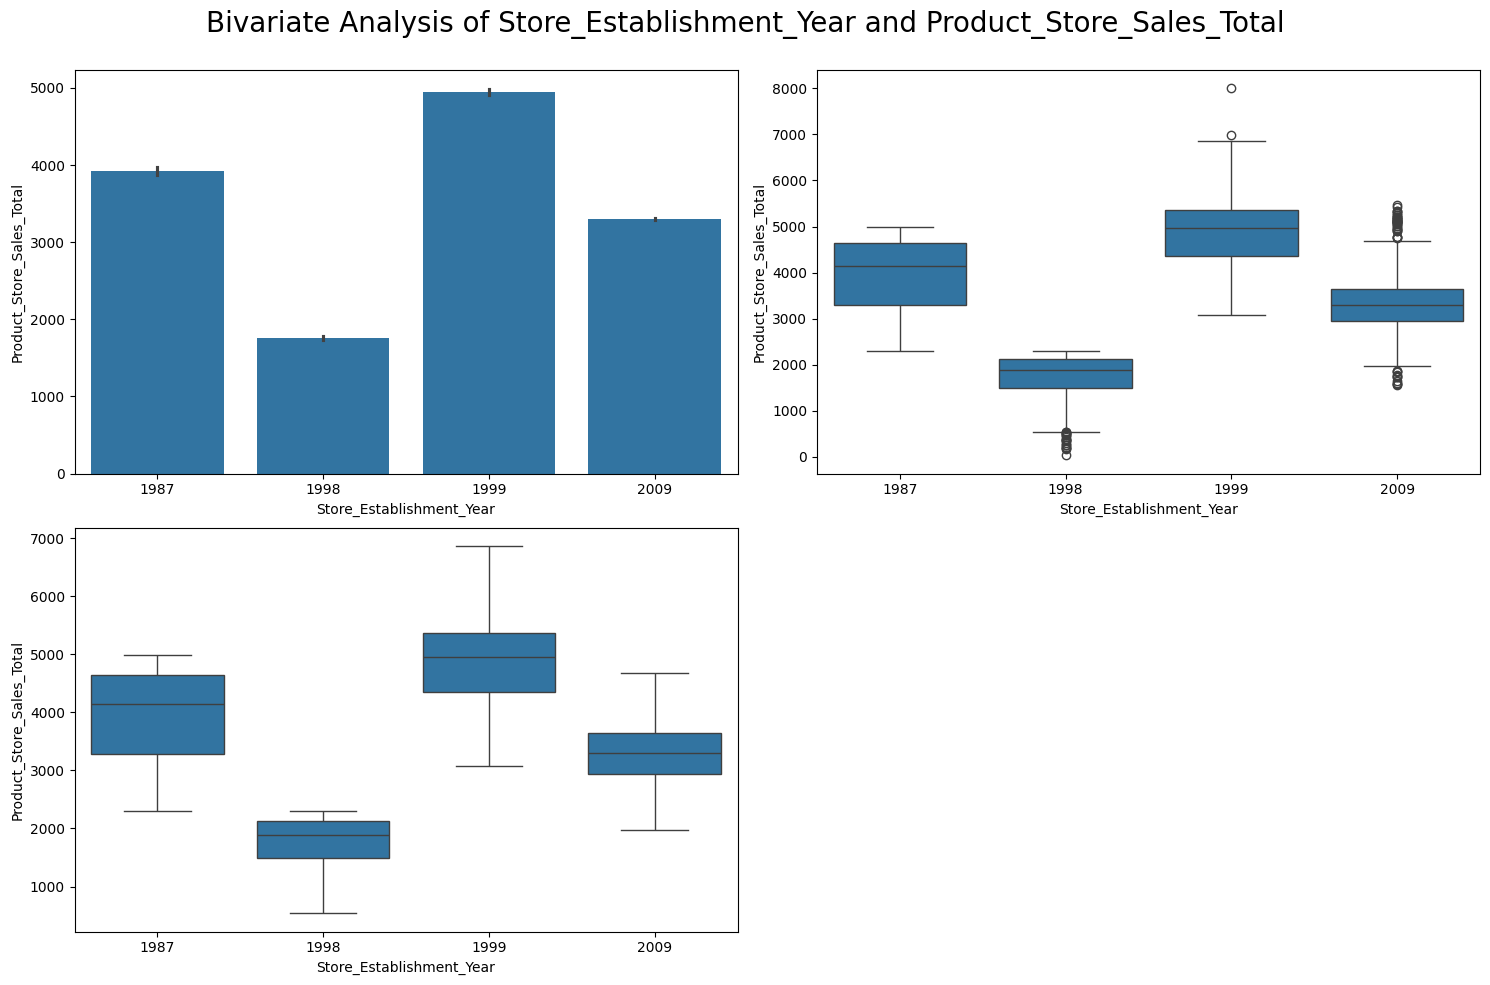

------------------------------------------------------------------------------------------------------------------------------------------------------


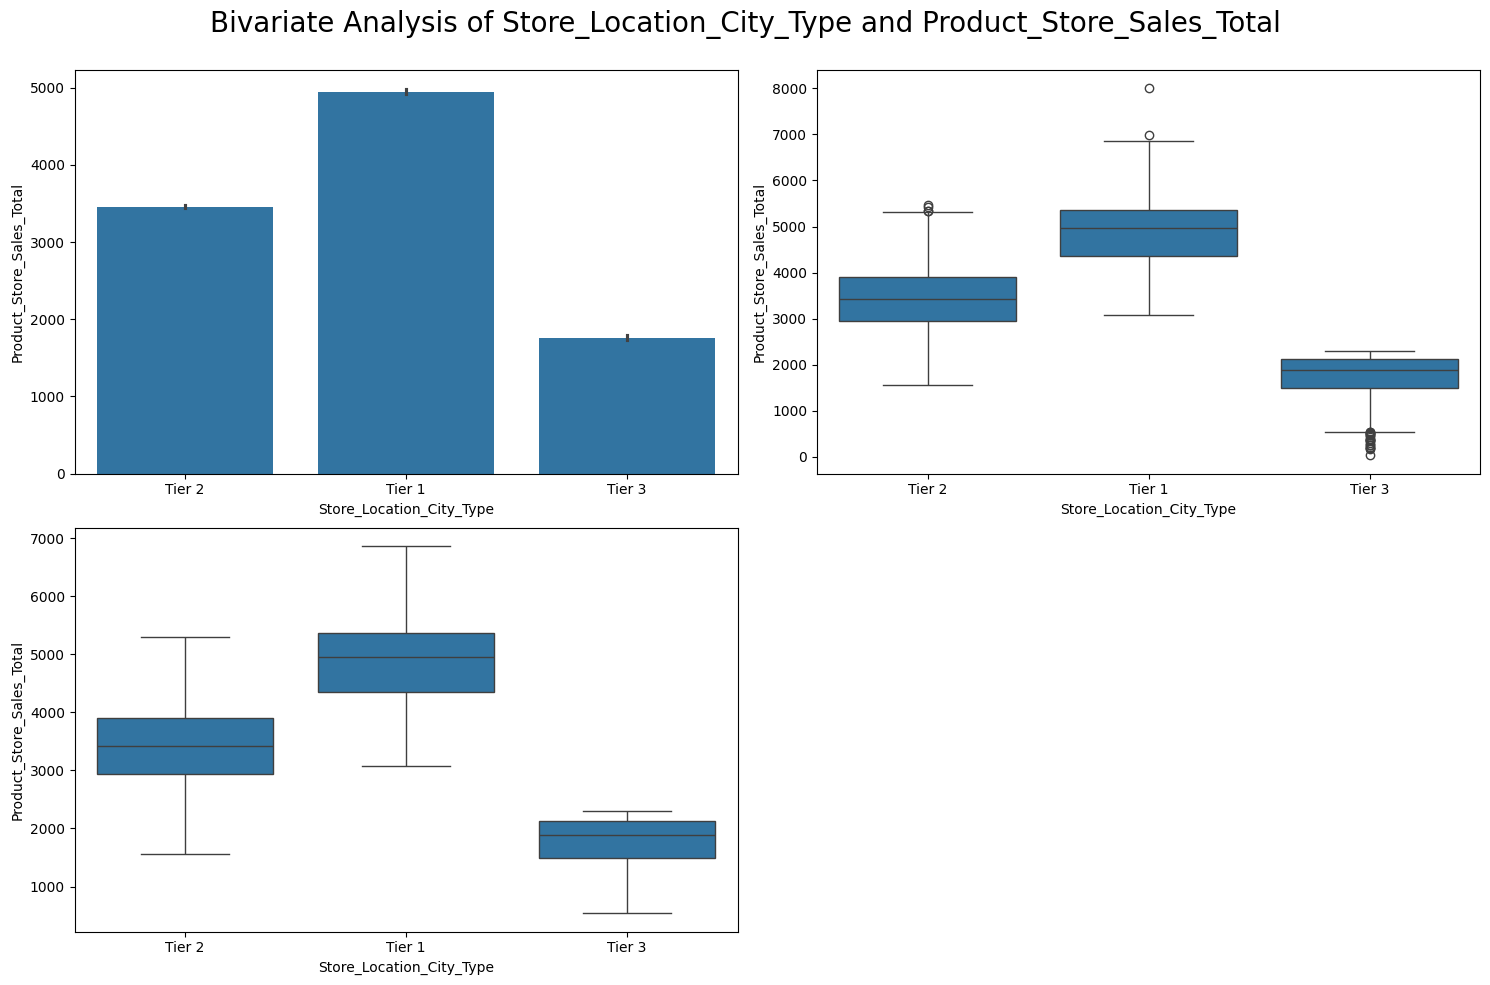

------------------------------------------------------------------------------------------------------------------------------------------------------


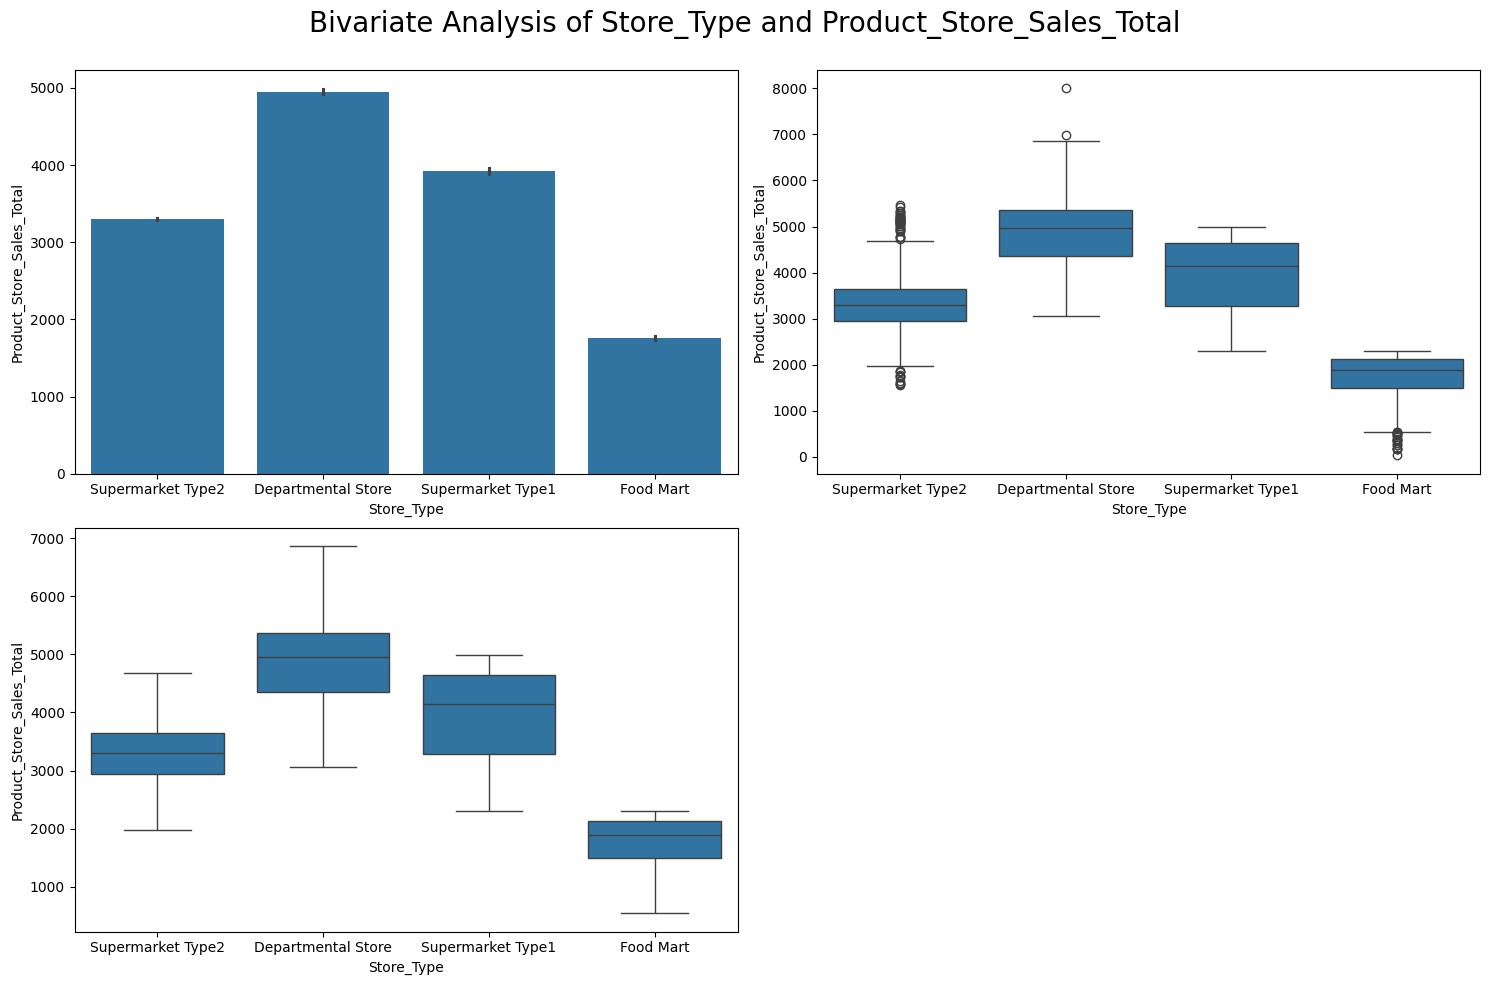

------------------------------------------------------------------------------------------------------------------------------------------------------


In [13]:
for i in catcols:
  plot_bivar('Product_Store_Sales_Total',i)
  print('-'*150)


**Bivariate Observations on Categorical Columns:**

- Outliers are observed across all categories.
- Although the **occurrence of sales** is high for:
  - `Low Sugar` content foods
  - `Fruits and Vegetables`
  - `Tier 2` cities
  - `OUT004` store outlet (established in 2009)
  - `Medium-sized stores`
  - `Supermarket Type2`

  as seen in univariate analysis, their **sales numbers or values** are relatively small.

- Most sales happen in the following categories:
  - Foods with **Regular Sugar** content.
  - **Starchy Foods**.
  - **Tier 1 cities**.
  - Store outlet **OUT003** (established in 1999).
  - **High-sized stores**.
  - **Departmental Stores** of `Store_Type`.


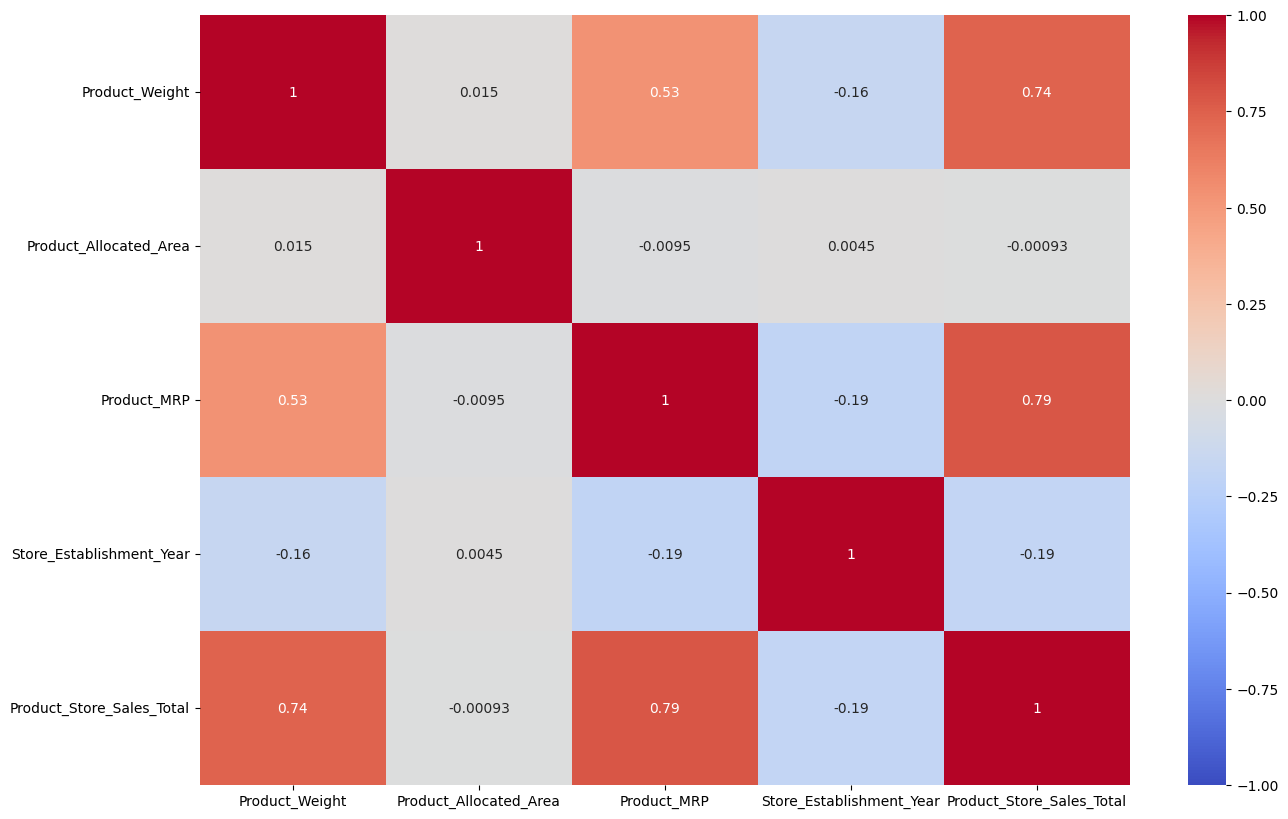

In [14]:
plt.figure(figsize=(15,10))
sns.heatmap(data[data.select_dtypes(exclude='object').columns.tolist()].corr(),annot=True,cmap='coolwarm',vmin=-1,cbar=True,vmax=1,)
plt.show()

**Multivariate Observations on the Correlations:**

- `Product_Weight` and `Product_MRP` show a **high correlation** with `Product_Store_Sales_Total`, with values of **0.74** and **0.79**, respectively.
- `Product_Allocated_Area` and `Store_Establishment_Year` exhibit a **small negative correlation**.



# **Data Preprocessing**

In [15]:
#Splitting of the data
x=data.drop(['Product_Store_Sales_Total','Product_Id'],axis=1)
y=data['Product_Store_Sales_Total']

In [16]:
x.head()

,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type
0,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2
1,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store
2,14.28,Regular,0.031,Canned,162.08,OUT001,1987,High,Tier 2,Supermarket Type1
3,12.10,Low Sugar,0.112,Baking Goods,186.31,OUT001,1987,High,Tier 2,Supermarket Type1
4,9.57,No Sugar,0.010,Health and Hygiene,123.67,OUT002,1998,Small,Tier 3,Food Mart


In [17]:
xtrain,xtemp,ytrain,ytemp=train_test_split(x,y,test_size=0.4,random_state=42)
xval,xtest,yval,ytest=train_test_split(xtemp,ytemp,test_size=0.5,random_state=42)


In [18]:
xtrain.shape,xval.shape,xtest.shape

((5257, 10), (1753, 10), (1753, 10))

In [19]:
ytrain.shape,yval.shape,ytest.shape

((5257,), (1753,), (1753,))

In [20]:
#Preprocessor
preprocessor=make_column_transformer(
    (StandardScaler(),['Product_Weight','Product_Allocated_Area','Product_MRP']),
    (OneHotEncoder(handle_unknown='ignore', sparse_output=False),['Product_Sugar_Content','Product_Type','Store_Id','Store_Size','Store_Location_City_Type','Store_Type','Store_Establishment_Year'])
    ,remainder='drop'
)

# **Model Building**

# Model Evaluation Criterion: R-Squared

**R-Squared** (also known as the Coefficient of Determination) is chosen as the primary evaluation criterion for the sales forecasting model. This metric measures how well the variance of the target variable (sales revenue) is explained by the independent variables in the model.

## Why R-Squared?

- **Goodness of Fit:** R-Squared evaluates the proportion of the variance in the dependent variable that is predictable from the independent variables.
- **Interpretability:** It provides an easy-to-understand measure of how well the model captures the relationship between features and the target variable.
- **Business Relevance:** A higher R-Squared value indicates that the model can explain more variation in sales revenue, which aligns with the business need to make accurate and reliable sales forecasts.


## Define functions for Model Evaluation

In [21]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mean_absolute_percentage_error(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

The ML models to be built can be any two out of the following:
1. Decision Tree
2. Bagging
3. Random Forest
4. AdaBoost
5. Gradient Boosting
6. XGBoost

### MODEL :1 RandomForestRegressor

In [22]:

M1=RandomForestRegressor(random_state=42)
M1_pip=make_pipeline(preprocessor,M1)
M1_pip.fit(xtrain,ytrain)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['Product_Weight',
                                                   'Product_Allocated_Area',
                                                   'Product_MRP']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Product_Sugar_Content',
                                                   'Product_Type', 'Store_Id',
                                                   'Store_Size',
                                                   'Store_Location_City_Type',
                                                   'Store_Type',
                                                   'Store_Establishment_Year'])])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [23]:
# Evaluation on Training set
M1tr=model_performance_regression(M1_pip,xtrain,ytrain)
M1tr

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,109.751113,41.188526,0.989266,0.989245,0.015463


In [24]:
# Evaluation on validation set
M1vl=model_performance_regression(M1_pip,xval,yval)
M1vl

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,276.7069,104.273205,0.934082,0.933703,0.038356


**Observation:**
- The model demonstrates a high R-Squared on the training set, indicating it effectively captures the variance in the target variable during training. While the validation R-Squared is slightly lower, it remains strong, suggesting reasonable generalization to unseen data.

- Error metrics on the validation set are higher than those on the training set, which could imply the model is slightly overfitting to the training data.

- It is possible that the untuned model is performing well due to the data being less complex, allowing the model to achieve strong predictive performance without requiring extensive tuning.


### Model 2: XGBRegressor

In [25]:
m2=XGBRegressor(random_state=42)
m2_pip=make_pipeline(preprocessor,m2)
m2_pip.fit(xtrain,ytrain)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['Product_Weight',
                                                   'Product_Allocated_Area',
                                                   'Product_MRP']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Product_Sugar_Content',
                                                   'Product_Type', 'Store_Id',
                                                   'Store_Size',
                                                   'Store_Location_City_Type',
                                                   'Store_Type',
                                                   'Store_...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

In [26]:
# Evaluation on Training set
M2tr=model_performance_regression(m2_pip,xtrain,ytrain)
M2tr

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,110.479305,57.340013,0.989123,0.989102,0.019861


In [27]:
# Evaluation on validation set
M2vl=model_performance_regression(m2_pip,xval,yval)
M2vl

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,298.820438,136.145921,0.923125,0.922684,0.050258


**Observation:**
- The R-Squared for both training and validation sets remains strong, with only a slight decline in the validation set compared to the previous model, indicating consistent generalization.

- The error metrics (RMSE and MAE) have increased slightly for the validation set, suggesting the current model may not handle certain patterns as effectively as the previous one.

- MAPE shows a noticeable rise in the validation set, indicating the predictions are less accurate compared to the earlier model, particularly for specific data points.


# **Model Performance Improvement - Hyperparameter Tuning**

### Model 3: HyperTuned RandomForestRegressor

In [28]:
M1_hp=RandomForestRegressor(random_state=42)
M1_hp_pip=make_pipeline(preprocessor,M1_hp)
rfparam={
    'randomforestregressor__max_depth':[3, 4, 5, 6,8,10,12,16],
    'randomforestregressor__n_estimators': [50, 75, 100, 125, 150]
}
sc=make_scorer(f1_score)
gridm1=GridSearchCV(M1_hp_pip,param_grid=rfparam,scoring=sc,cv=4,n_jobs=-1)
gridm1.fit(xtrain,ytrain)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         ['Product_Weight',
                                                                          'Product_Allocated_Area',
                                                                          'Product_MRP']),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['Product_Sugar_Content',
                                                                          'Product_Type',
                                                                          'Store_Id',
                                                                          'Store_Size',
                                                                          'Store_Location_City_Type',
                                                                          'Store_Type',
                                                                          'Store_Establishment_Year'])])),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__max_depth': [3, 4, 5, 6, 8, 10,
                                                              12, 16],
                         'randomforestregressor__n_estimators': [50, 75, 100,
                                                                 125, 150]},
             scoring=make_scorer(f1_score, response_method='predict'))

In [29]:
best_rf= gridm1.best_estimator_
best_rf

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['Product_Weight',
                                                   'Product_Allocated_Area',
                                                   'Product_MRP']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Product_Sugar_Content',
                                                   'Product_Type', 'Store_Id',
                                                   'Store_Size',
                                                   'Store_Location_City_Type',
                                                   'Store_Type',
                                                   'Store_Establishment_Year'])])),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=3, n_estimators=50,
                                       random_state=42))])

In [30]:
# Evaluation on Training set
best_rf.fit(xtrain,ytrain)
b1tr=model_performance_regression(best_rf,xtrain,ytrain)
b1tr

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,458.752527,348.974952,0.812456,0.812099,0.129696


In [31]:
# Evaluation on validation set
b1vl=model_performance_regression(best_rf,xval,yval)
b1vl

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,459.307259,354.644867,0.818377,0.817334,0.127176


**Observations:**
- The R-Squared for both training and validation sets is significantly lower compared to the previous models (RF and XGB), indicating that the hypertuned RF model struggles to capture the variance in the data effectively.

- The error metrics (RMSE and MAE) are much higher for both training and validation sets compared to the earlier models, suggesting reduced prediction accuracy after hyperparameter tuning.

- Unlike the previous models, the MAPE for training and validation sets is nearly identical, indicating better consistency but at the cost of overall model performance.


### Model 4: Hypertuned XGBRegressor

In [32]:
M2_hp=XGBRegressor(random_state=42)
M2_hp_pip=make_pipeline(preprocessor,M2_hp)
xgbparam={
    'xgbregressor__n_estimators': [50, 100, 200,300,400,500],    # number of tree to build
    'xgbregressor__max_depth': [2, 3,6,8,10],    # maximum depth of each tree
    'xgbregressor__colsample_bytree': [0.4, 0.5, 0.6],    # percentage of attributes to be considered (randomly) for each tree
    'xgbregressor__colsample_bylevel': [0.4, 0.5, 0.6],    # percentage of attributes to be considered (randomly) for each level of a tree

}
gridm2=GridSearchCV(M2_hp_pip,param_grid=xgbparam,scoring=sc,cv=4,n_jobs=-1)
gridm2.fit(xtrain,ytrain)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         ['Product_Weight',
                                                                          'Product_Allocated_Area',
                                                                          'Product_MRP']),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['Product_Sugar_Content',
                                                                          'Product_Type',
                                                                          'Store_Id',
                                                                          'Store_Size',
                                                                          'Store_Location_Cit...
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     random_state=42, ...))]),
             n_jobs=-1,
             param_grid={'xgbregressor__colsample_bylevel': [0.4, 0.5, 0.6],
                         'xgbregressor__colsample_bytree': [0.4, 0.5, 0.6],
                         'xgbregressor__max_depth': [2, 3, 6, 8, 10],
                         'xgbregressor__n_estimators': [50, 100, 200, 300, 400,
                                                        500]},
             scoring=make_scorer(f1_score, response_method='predict'))

In [33]:
best_xgb= gridm2.best_estimator_
best_xgb

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['Product_Weight',
                                                   'Product_Allocated_Area',
                                                   'Product_MRP']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Product_Sugar_Content',
                                                   'Product_Type', 'Store_Id',
                                                   'Store_Size',
                                                   'Store_Location_City_Type',
                                                   'Store_Type',
                                                   'Store_...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=2, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=50, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

In [34]:
# Evaluation on Training set
best_xgb.fit(xtrain,ytrain)
b2tr=model_performance_regression(best_xgb,xtrain,ytrain)
b2tr

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,393.732806,261.617469,0.861851,0.861587,0.101949


In [35]:
# Evaluation on validation set
b2vl=model_performance_regression(best_xgb,xval,yval)
b2vl

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,379.319057,263.532363,0.876128,0.875417,0.098214


**Observations:**
- The R-Squared for the hypertuned XGB model shows improvement over the hypertuned RF model but remains lower than the untuned RF and XGB models, indicating moderate performance gains.

- Error metrics (RMSE and MAE) are reduced compared to the hypertuned RF model, suggesting better accuracy, though still higher than the untuned models.

- MAPE for both training and validation sets is notably lower than the hypertuned RF model, reflecting improved consistency and prediction accuracy.


# **Model Performance Comparison, Final Model Selection, and Serialization**

In [36]:
train_eval=pd.concat([M1tr.T,M2tr.T,b1tr.T,b2tr.T],axis=1)
train_eval.columns=['Random_forest','XGB','Hypertuned-Rfg','Hypertuned-XGBr']
print("Evaluation of models on training data")
print('**'*50)
print(train_eval.T)

Evaluation of models on training data
****************************************************************************************************
                       RMSE         MAE  R-squared  Adj. R-squared      MAPE
Random_forest    109.751113   41.188526   0.989266        0.989245  0.015463
XGB              110.479305   57.340013   0.989123        0.989102  0.019861
Hypertuned-Rfg   458.752527  348.974952   0.812456        0.812099  0.129696
Hypertuned-XGBr  393.732806  261.617469   0.861851        0.861587  0.101949


In [37]:
val_eval=pd.concat([M1vl.T,M2vl.T,b1vl.T,b2vl.T],axis=1)
val_eval.columns=['Random_forest','XGB','Hypertuned-Rfg','Hypertuned-XGBr']
print("Evaluation of models on validation data")
print('**'*50)
print(val_eval.T)


Evaluation of models on validation data
****************************************************************************************************
                       RMSE         MAE  R-squared  Adj. R-squared      MAPE
Random_forest    276.706900  104.273205   0.934082        0.933703  0.038356
XGB              298.820438  136.145921   0.923125        0.922684  0.050258
Hypertuned-Rfg   459.307259  354.644867   0.818377        0.817334  0.127176
Hypertuned-XGBr  379.319057  263.532363   0.876128        0.875417  0.098214


### Observations: **Best Model:Model 1 (Untuned Random Forest model)**

- The **Random Forest model** performs best overall, with the highest R-Squared on both training and validation data, indicating it explains the largest variance in the target variable.

- Error metrics (RMSE and MAE) for Random Forest are significantly lower than the hypertuned models, showcasing better prediction accuracy and robustness.

- The Random Forest model achieves the lowest MAPE across training and validation datasets. This suggests that the untuned model is well-suited to the less complex data structure, enabling strong performance when compared to hyperparameter tuned models.


In [38]:
eval_best_mod=pd.concat([M1tr.T,M1vl.T,model_performance_regression(M1_pip,xtest,ytest).T],axis=1)
eval_best_mod.columns=['Train','Val','Test']
print("Evaluation of models on test data")
print('**'*50)

print(eval_best_mod)

Evaluation of models on test data
****************************************************************************************************
                     Train         Val        Test
RMSE            109.751113  276.706900  301.289074
MAE              41.188526  104.273205  114.946514
R-squared         0.989266    0.934082    0.920952
Adj. R-squared    0.989245    0.933703    0.920498
MAPE              0.015463    0.038356    0.043095


### Observations for the Best Model:

- The model maintains a high R-Squared across training, validation, and test datasets, indicating it consistently explains a large proportion of the variance in the target variable.

- Error metrics (RMSE and MAE) gradually increase from training to test data, suggesting slight performance degradation on unseen data but overall robust generalization.

- The MAPE remains low across all datasets, reflecting the model's ability to make accurate predictions with minimal relative error, making it reliable for forecasting tasks.


# **Deployment - Backend**

## Flask Web Framework


In [39]:
#making backend Directory
os.makedirs('backend',exist_ok=True)

In [40]:
#Serialising and Saving the model
save_path='backend/model.joblib'
joblib.dump(M1_pip,save_path)

['backend/model.joblib']

In [41]:
sa=joblib.load(save_path)
sa

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['Product_Weight',
                                                   'Product_Allocated_Area',
                                                   'Product_MRP']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Product_Sugar_Content',
                                                   'Product_Type', 'Store_Id',
                                                   'Store_Size',
                                                   'Store_Location_City_Type',
                                                   'Store_Type',
                                                   'Store_Establishment_Year'])])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [42]:
%%writefile backend/app.py
import joblib
import numpy as np
import pandas as pd
from flask import Flask, request, jsonify
super_kart_api=Flask("Superkart_price_prediction")
model=joblib.load('model.joblib')
@super_kart_api.get('/')
def home():
  return "Welcome to SuperKart sales Prediction"
@super_kart_api.post('/v1/spkart_single')
def sale_pred_single():
  sale_data=request.get_json()
  # Read input data
  sample={
      'Product_Weight':sale_data['Product_Weight'],
      'Product_Sugar_Content':sale_data['Product_Sugar_Content'],
      'Product_Allocated_Area':sale_data['Product_Allocated_Area'],
      'Product_Type':sale_data['Product_Type'],
      'Product_MRP':sale_data['Product_MRP'],
      'Store_Id':sale_data['Store_Id'],
      'Store_Establishment_Year':sale_data['Store_Establishment_Year'],
      'Store_Size':sale_data['Store_Size'],
      'Store_Location_City_Type':sale_data['Store_Location_City_Type'],
      'Store_Type':sale_data['Store_Type'],

  }
  input_data=pd.DataFrame([sample])
  # Make predictions
  predicted_sale=model.predict(input_data)[0]
  # Create response
  response={'Store_Outlet':sample['Store_Id'],"Sale":round(float(predicted_sale), 2)}
  return jsonify(response)

@super_kart_api.post('/v1/spkart_batch')
def sale_pred_batch():
    file = request.files['file']
    print("File Received:", file.filename)
    # Read input data
    input_data = pd.read_csv(file)
    # Make predictions
    predicted_sale = model.predict(input_data).tolist()
    # Add predictions to input data
    input_data['Predicted_Sale'] = predicted_sale
    # Group by Store_Id and sum the predicted sales
    grouped_sales = input_data.groupby('Store_Id')['Predicted_Sale'].sum().to_dict()
    # Create response
    response = {
        'store_sales': {store_id: round(float(sale), 2) for store_id, sale in grouped_sales.items()}
    }
    print("Final Response:", response)

    return jsonify(response)




if __name__=='__main__':
  super_kart_api.run()

Writing backend/app.py


## Dependencies File

In [43]:
%%writefile backend/requirements.txt
pandas==2.2.2
numpy==2.0.2
scikit-learn==1.6.1
xgboost==2.1.4
joblib==1.5.1
Werkzeug==3.1.3
flask==3.1.1
gunicorn==23.0.0
requests==2.32.3
streamlit==1.46.1

Writing backend/requirements.txt


## Dockerfile

In [44]:
%%writefile backend/Dockerfile
FROM python:3.9-slim

# Set the working directory inside the container
WORKDIR /app

# Copy all files from the current directory to the container's working directory
COPY . .

# Install dependencies from the requirements file without using cache to reduce image size
RUN pip install --no-cache-dir --upgrade -r requirements.txt

# Define the command to start the application using Gunicorn with 4 worker processes
# - `-w 4`: Uses 4 worker processes for handling requests
# - `-b 0.0.0.0:7860`: Binds the server to port 7860 on all network interfaces
# - `app:app`: Runs the Flask app (assuming `app.py` contains the Flask instance named `app`)
CMD ["gunicorn", "-w", "4", "-b", "0.0.0.0:7860", "app:super_kart_api"]

Writing backend/Dockerfile


## Setting up a Hugging Face Docker Space for the Backend

In [45]:
from huggingface_hub import create_repo
ak=access_key
login(ak)
try:
  create_repo('back_end_files',repo_type='space',space_sdk='docker',private=False)
except:
  if "RepositoryAlreadyExistsError" in str(e):
    print("Repository already exists. Skipping creation.")
  else:
    print(f"Error creating repository: {e}")

## Uploading Files to Hugging Face Space (Docker Space)

In [46]:
ak=access_key
login(token=ak)
space='Enoch1359/Back_end_files'
api=HfApi()
api.upload_folder(folder_path='/content/backend',repo_id=space,repo_type='space')

model.joblib:   0%|          | 0.00/47.9M [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/spaces/Enoch1359/back_end_files/commit/eabff23eb6d79e493f83a642d1d7096ec6d4fb0c', commit_message='Upload folder using huggingface_hub', commit_description='', oid='eabff23eb6d79e493f83a642d1d7096ec6d4fb0c', pr_url=None, repo_url=RepoUrl('https://huggingface.co/spaces/Enoch1359/back_end_files', endpoint='https://huggingface.co', repo_type='space', repo_id='Enoch1359/back_end_files'), pr_revision=None, pr_num=None)

# **Deployment - Frontend**

## Creating frontend files and sending them to already created Streamlit space on Hugging Face

## Streamlit for Interactive UI

In [47]:
#making Directory for frontend files
os.makedirs('frontend_files',exist_ok=True)

In [48]:
xtrain.columns

Index(['Product_Weight', 'Product_Sugar_Content', 'Product_Allocated_Area',
       'Product_Type', 'Product_MRP', 'Store_Id', 'Store_Establishment_Year',
       'Store_Size', 'Store_Location_City_Type', 'Store_Type'],
      dtype='object')

In [49]:
%%writefile frontend_files/app.py
import pandas as pd
import requests
import streamlit as st

st.title('SuperKart Sale Prediction')

# Inputs for prediction
Product_Weight = st.number_input('Product_Weight', value=15.46)
Product_Sugar_Content = st.selectbox('Product_Sugar_Content', ['No Sugar', 'Low Sugar', 'Regular', 'reg'], index=0)
Product_Allocated_Area = st.number_input('Product_Allocated_Area', value=0.026)
Product_Type = st.selectbox('Product_Type', ['Household', 'Soft Drinks', 'Fruits and Vegetables',
                                             'Baking Goods', 'Meat', 'Dairy', 'Canned', 'Snack Foods',
                                             'Frozen Foods', 'Health and Hygiene', 'Breads', 'Hard Drinks',
                                             'Others', 'Starchy Foods', 'Breakfast', 'Seafood'], index=0)
Product_MRP = st.number_input('Product_MRP', value=171.83)
Store_Id = st.selectbox('Store_Id', ['OUT001', 'OUT003', 'OUT004', 'OUT002'], index=0)
Store_Establishment_Year = st.selectbox('Store_Establishment_Year',[1987,1998,1999,2009], index=0)
Store_Size = st.selectbox('Store_Size', ['Small', 'Medium', 'High'], index=0)
Store_Location_City_Type = st.selectbox('Store_Location_City_Type', ['Tier 1', 'Tier 2', 'Tier 3'], index=1)
Store_Type = st.selectbox('Store_Type', ['Supermarket Type1', 'Departmental Store', 'Supermarket Type2', 'Food Mart'], index=0)


# Create input data as DataFrame
input_data = pd.DataFrame([{
    'Product_Weight': Product_Weight,
    'Product_Sugar_Content': Product_Sugar_Content,
    'Product_Allocated_Area': Product_Allocated_Area,
    'Product_Type': Product_Type,
    'Product_MRP': Product_MRP,
    'Store_Id': Store_Id,
    'Store_Establishment_Year': Store_Establishment_Year,
    'Store_Size': Store_Size,
    'Store_Location_City_Type': Store_Location_City_Type,
    'Store_Type': Store_Type,

}])

# Single prediction
if st.button('Predict'):
    response = requests.post(
        'https://enoch1359-back-end-files.hf.space/v1/spkart_single',
        json=input_data.to_dict(orient='records')[0]
    )
    if response.status_code == 200:
        prediction = response.json()
        st.success(f"Predicted Sale: {prediction['Sale']}")
    else:
        st.error(f"Error making prediction: {response.text}")

# Batch prediction
st.subheader('Batch Prediction')
uploaded_file = st.file_uploader('Upload a CSV file', type=['csv'])
if uploaded_file is not None:
    if st.button('Predict Batch'):
        response = requests.post(
            'https://enoch1359-back-end-files.hf.space/v1/spkart_batch',
            files={'file': uploaded_file}
        )
        if response.status_code == 200:
            predictions = response.json()
            st.success("Batch predictions completed!")
            st.json(predictions)
        else:
            st.error(f"Error making batch prediction: {response.text}")


Writing frontend_files/app.py


## Dependencies File

In [50]:
%%writefile frontend_files/requirements.txt
pandas==2.2.2
requests==2.28.1
streamlit==1.43.2

Writing frontend_files/requirements.txt


## DockerFile

In [51]:
%%writefile frontend_files/Dockerfile
# Use a minimal base image with Python 3.9 installed
FROM python:3.9-slim

# Set the working directory inside the container to /app
WORKDIR /app

# Copy all files from the current directory on the host to the container's /app directory
COPY . .

# Install Python dependencies listed in requirements.txt
RUN pip3 install -r requirements.txt

# Define the command to run the Streamlit app on port 8501 and make it accessible externally
CMD ["streamlit", "run", "app.py", "--server.port=8501", "--server.address=0.0.0.0", "--server.enableXsrfProtection=false"]

# NOTE: Disable XSRF protection for easier external access in order to make batch predictions

Writing frontend_files/Dockerfile


## Uploading Files to Hugging Face Space (Streamlit Space)

In [52]:
ak=access_key
login(token=ak)
space='Enoch1359/front_end_files'
api=HfApi()
api.upload_folder(folder_path='/content/frontend_files',repo_id=space,repo_type='space')

CommitInfo(commit_url='https://huggingface.co/spaces/Enoch1359/front_end_files/commit/e9d205031ecd798df9c1192983c005791fc6a5c8', commit_message='Upload folder using huggingface_hub', commit_description='', oid='e9d205031ecd798df9c1192983c005791fc6a5c8', pr_url=None, repo_url=RepoUrl('https://huggingface.co/spaces/Enoch1359/front_end_files', endpoint='https://huggingface.co', repo_type='space', repo_id='Enoch1359/front_end_files'), pr_revision=None, pr_num=None)

## Online Inference
The idea is to send a single request to the API and receive an immediate response. This is useful for real-time applications like recommendation systems and fraud detection.

* This data is sent as a JSON payload in a POST request to the model endpoint.
* The model processes the input features and returns a prediction as a JSON payload.

In [53]:
import json
import requests

In [54]:
# making backend urls
model_root_url_back = "https://Enoch1359-back-end-files.hf.space"
model_root_url_back

'https://Enoch1359-back-end-files.hf.space'

In [55]:
model_url_single_backend = model_root_url_back + '/v1/spkart_single'
model_batch_url_backend = model_root_url_back + "/v1/spkart_batch"
model_batch_url_backend

'https://Enoch1359-back-end-files.hf.space/v1/spkart_batch'

In [56]:
payload = {'Product_Weight':15.46	,
           'Product_Sugar_Content':'No Sugar',
           'Product_Allocated_Area':0.026,
           'Product_Type':'Household',
           'Product_MRP':171.83,
           'Store_Establishment_Year':1987,
           'Store_Id':'OUT001',
           'Store_Size':'High',
           'Store_Location_City_Type':'Tier 2',
           'Store_Type':'Supermarket Type1',

}

In [57]:
# Response from backend for single prediction
response = requests.post(model_url_single_backend, json=payload)
response.json()

{'Sale': 4599.76, 'Store_Outlet': 'OUT001'}

In [58]:
# Response from Frontend for single prediction
from IPython.display import IFrame, display

# URL of your deployed frontend
frontend_url = "https://Enoch1359-front-end-files.hf.space"

# Embed the frontend in an iframe
display(IFrame(frontend_url, width=1000, height=600))


**Single Prediction:**

- A JSON input containing details of a single product is sent to the model.
- The output is the predicted sale of that product for a specific store outlet.
- This aligns with the objective of providing product-level insights to enhance store sales strategies.


##Batch Inference
The idea is to send a batch of requests to the API and receive a response. The backend reads the entire dataset, runs it through the ML model, and returns the prediction for every row in the file. This is useful for applications like loan default prediction and customer churn prediction, where we don't need results instantaneously.

- This data is sent as a CSV file in a POST request to the model endpoint.
- The model processes each row containing the input features and returns the predictions for each row as one single JSON payload.

In [59]:
# Response form backend for batch prediction
# Taking Xtest first rows as a batch
xtest.head(5).to_csv('batch_input.csv', header=True, index=False)

# Prepare the file for upload
batch_input = {
    'file': open('batch_input.csv', 'rb')  # Open the saved CSV file in binary read mode
}

# Send the request to the API
response = requests.post(
    model_batch_url_backend,  # Replace with your API URL
    files=batch_input
)
response.text

'{"store_sales":{"OUT001":4144.45,"OUT003":15732.79,"OUT004":3952.79}}\n'

In [60]:
# Response from frontend for Batch prediction
# URL of your deployed frontend
frontend_url = "https://Enoch1359-front-end-files.hf.space"

# Embed the frontend in an iframe
display(IFrame(frontend_url, width=1000, height=600))


In [61]:
comparison=pd.concat([ytest.head(5),xtest['Store_Id'].head()],axis=1)
comparison.columns=['Sale','Store_Id']
comparison.groupby('Store_Id').sum()

,Sale
Store_Id,
OUT001,4160.54
OUT003,15585.13
OUT004,3956.75


**Batch Prediction:**

- A CSV file containing details of multiple products is uploaded to the model.
- The output is the aggregated predicted sales for the specified store outlet.
- This supports the objective of forecasting store-level sales to optimize inventory management and regional sales strategies.
- The predicted sales for each store outlet are almost accurate, with only minor deviations from the original values.


#**Actionable Insights and Business Recommendations**

1. **Data Required for Model Prediction**:  
   The model utilizes the following features from the original dataset to predict sales:  
   - `Product_Weight`  
   - `Product_Sugar_Content`  
   - `Product_Allocated_Area`  
   - `Product_Type`  
   - `Product_MRP`  
   - `Store_Id`  
   - `Store_Establishment_Year`  
   - `Store_Size`  
   - `Store_Location_City_Type`  
   - `Store_Type`  

   Excluded columns:  
   - `Product_Id`: Irrelevant for model learning.  
   - `Product_Store_Sales_Total`: Target variable to be predicted.  

2. **Optimize Inventory Management**:  
   - Use predicted sales data to adjust stock levels and avoid overstocking or understocking.  
2. **Regional Sales Strategies:**
   - Focus on Tier 2 cities where sales occurrences are high but overall revenue generation is moderate.
   - Develop targeted marketing campaigns for underperforming regions or store types to boost sales.

3. **Product Placement and Promotion:**
   - Prioritize promoting products with regular sugar content and starchy foods, as they generate higher sales.
   - Allocate more display area to high-demand categories like Fruits and Vegetables to enhance visibility and drive sales.

4. **Store-Level Improvements:**
   - Leverage insights from top-performing stores (e.g., OUT003) to replicate successful strategies across other outlets.
   - Plan expansion or upgrade strategies for medium-sized stores showing consistent sales growth.

5. **More Data:**
   - Collect additional data points such as seasonal trends, customer demographics, and external factors (e.g., promotions, holidays) to improve model accuracy and provide deeper insights for decision-making.

##**Conclusion on Model Deployment**
1. **Flexibility and Scalability**: Separating the frontend and backend allows independent updates and scaling. The user interface can change without affecting the model, and the backend can handle more requests without slowing the frontend.

2. **Technology Agnostic**: Different tools can be used for the frontend and backend, like Streamlit for the frontend and Flask for the backend. This allows choosing the best tools for each task.

3. **Reusability**: The backend API can be reused in other apps or shared with partners, making the prediction model more efficient and versatile across projects.

